# Flower Recognition CNN

In [1]:
import numpy as np
import keras
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

C:\Users\DELL PC\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [53]:
train_path = r'flowers\train'
validation_path = r'flowers\validation'
test_path = r'flowers\test'

In [5]:
datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)
batch_size = 10

In [177]:
# classes are automatically inferred from subdirectories
train_generator = ImageDataGenerator().flow_from_directory( train_path,
                                                            target_size=(224, 224),
                                                            batch_size=5,
                                                            class_mode='categorical',
                                                            shuffle=True)
   
validation_generator = ImageDataGenerator().flow_from_directory( validation_path,
                                                                 target_size=(224, 224),
                                                                 batch_size=5,
                                                                 class_mode='categorical',
                                                                 shuffle=True)

test_generator = ImageDataGenerator().flow_from_directory( test_path,
                                                           target_size=(224, 224),
                                                           batch_size=5,
                                                           class_mode='categorical',
                                                           shuffle=True)

Found 100 images belonging to 5 classes.
Found 870 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [7]:
# For visualising images with labels
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3): ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

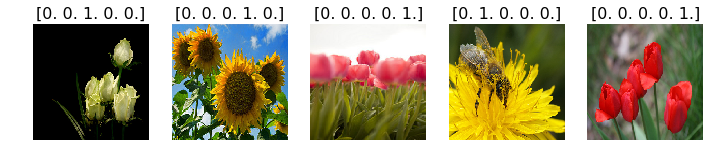

In [15]:
img, labels = next(train_generator)
plots(img, titles=labels)

In [9]:
model = models.Sequential()
model.add( layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)) )
model.add( layers.Flatten() )
model.add( layers.Dense(5,activation='softmax') )

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 7885445   
Total params: 7,886,341
Trainable params: 7,886,341
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit_generator(train_generator, 
                    steps_per_epoch=5, 
                    validation_data=validation_generator, 
                    validation_steps=5, 
                    epochs=10, 
                    verbose=2)

Epoch 1/10
 - 31s - loss: 12.9118 - acc: 0.2000 - val_loss: 13.2774 - val_acc: 0.1759
Epoch 2/10
 - 23s - loss: 12.8945 - acc: 0.2000 - val_loss: 13.2465 - val_acc: 0.1782
Epoch 3/10
 - 24s - loss: 12.2498 - acc: 0.2400 - val_loss: 13.2465 - val_acc: 0.1782
Epoch 4/10
 - 24s - loss: 12.2498 - acc: 0.2400 - val_loss: 13.2465 - val_acc: 0.1782
Epoch 5/10
 - 23s - loss: 12.8945 - acc: 0.2000 - val_loss: 13.2465 - val_acc: 0.1782
Epoch 6/10
 - 23s - loss: 13.5392 - acc: 0.1600 - val_loss: 13.2465 - val_acc: 0.1782
Epoch 7/10
 - 24s - loss: 11.6050 - acc: 0.2800 - val_loss: 13.2465 - val_acc: 0.1782
Epoch 8/10
 - 22s - loss: 12.8945 - acc: 0.2000 - val_loss: 13.2465 - val_acc: 0.1782
Epoch 9/10
 - 22s - loss: 14.1839 - acc: 0.1200 - val_loss: 13.2465 - val_acc: 0.1782
Epoch 10/10
 - 21s - loss: 11.6050 - acc: 0.2800 - val_loss: 13.2465 - val_acc: 0.1782


## Predicting classes

In [96]:
%time
test_imgs, test_labels = next(test_generator)

Wall time: 0 ns


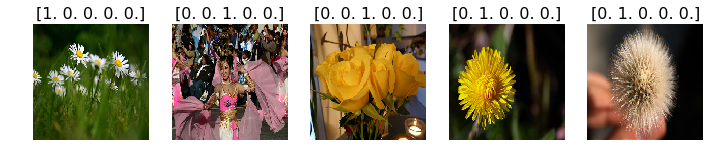

In [97]:
plots(test_imgs, titles=test_labels)

In [62]:
predictions = model.predict_generator(test_generator, verbose=2)

## Plotting Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [72]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4])

In [99]:
predictions;

In [100]:
# converting one hot encoding to class number for predictions 2d array
predictions_classes = []
for i in predictions:
    for j in range(5):
        if(i[j] == 1.0):
            predictions_classes.append(j)

In [102]:
test_labels_OneHot.shape

(200, 5)

Confusion matrix, without normalization
[[ 0  0  0 40  0]
 [ 0  0  0 40  0]
 [ 0  0  1 39  0]
 [ 0  0  0 40  0]
 [ 0  0  1 39  0]]


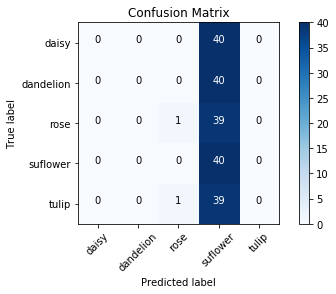

In [103]:
cm = confusion_matrix(test_generator.classes, predictions_classes)
plot_confusion_matrix(cm, 
                      classes=['daisy', 'dandelion', 'rose', 'suflower', 'tulip'],
                      title='Confusion Matrix')

## Transfer Learning - Using models as Feature Extractor

In [110]:
from keras.applications import inception_v3
from keras.applications.inception_v3 import preprocess_input
from keras.applications import xception
from keras.applications.xception import preprocess_input
from keras.applications import vgg16
from keras.applications.vgg16 import preprocess_input

In [108]:
%%time 
# Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Load the Xception model
Xception_model = xception.Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Load the vgg16 model
vgg16_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

Wall time: 40.2 s


In [173]:
#vgg16_model.summary()

In [204]:
# OBSERVE THAT FIRST INPUT LAYER IS NOT DISPLAYED BUT IT EXISTS
model = models.Sequential()
model.add(layers.Conv2D(2, (3,3), activation='relu', input_shape=(20,20,3) ))
model.add(layers.Conv2D(3, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_200 (Conv2D)          (None, 18, 18, 2)         56        
_________________________________________________________________
conv2d_201 (Conv2D)          (None, 16, 16, 3)         57        
_________________________________________________________________
flatten_3 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 1538      
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________


In [161]:
# include_top=False removes last four layers flatten fc1 fc2 and predictions
vgg16_model_withTop = vgg16.VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))

#vgg16_model_withTop.summary()

In [162]:
vgg16_model_withTop.layers.pop()
vgg16_model_withTop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [175]:
# removing layers where training not required can be customised too
for layer in vgg16_model_withTop.layers:
    layer.trainable = False
    
# vgg16_model_withTop.summary()

In [170]:
# updated way to do fine tuning in keras
base_model = vgg16_model_withTop
this_model = models.Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

In [171]:
custom_Vgg16_Model = models.Sequential()
# making a sequential model out of vgg16 with top
custom_Vgg16_Model.add(this_model)
# add a 5 neuron dense layer in the end for classification of 5 categories
custom_Vgg16_Model.add(layers.Dense(5,activation='softmax'))

In [172]:
custom_Vgg16_Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 4096)              134260544 
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 20485     
Total params: 134,281,029
Trainable params: 20,485
Non-trainable params: 134,260,544
_________________________________________________________________


In [176]:
custom_Vgg16_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [196]:
custom_Vgg16_Model.fit_generator(train_generator, 
                                 steps_per_epoch=5, 
                                 validation_data=test_generator, 
                                 validation_steps=5,
                                 epochs=5, 
                                 verbose=2)

""" # with computing power
custom_Vgg16_Model.fit_generator(train_generator, 
                                 steps_per_epoch=5, 
                                 validation_data=validation_generator, 
                                 validation_steps=5, 
                                 epochs=5, 
                                 verbose=2)
"""

Epoch 1/5
 - 178s - loss: 0.1209 - acc: 1.0000 - val_loss: 0.5293 - val_acc: 0.8400
Epoch 2/5
 - 172s - loss: 0.0179 - acc: 1.0000 - val_loss: 0.4747 - val_acc: 0.8400
Epoch 3/5
 - 190s - loss: 0.1021 - acc: 0.9600 - val_loss: 0.4578 - val_acc: 0.8500
Epoch 4/5
 - 194s - loss: 0.1348 - acc: 0.9600 - val_loss: 0.5315 - val_acc: 0.8350
Epoch 5/5
 - 174s - loss: 0.0477 - acc: 0.9600 - val_loss: 0.6224 - val_acc: 0.8250


' # with computing power\ncustom_Vgg16_Model.fit_generator(train_generator, \n                                 steps_per_epoch=5, \n                                 validation_data=validation_generator, \n                                 validation_steps=5, \n                                 epochs=5, \n                                 verbose=2)\n'

In [180]:
%%time
predictions_customvgg = custom_Vgg16_Model.predict_generator(test_generator, verbose=2)

### Multilabel classes can also be predicted by putting condition i[j] > 0.5 or something

In [197]:
# converting class probabilities to one hot
predictions_classes = []

for i in predictions_customvgg:
    maxProb = 0
    maxProbClass = 0
    for j in range(5):
        if(i[j] > maxProb):
            maxProbClass = j
            maxProb = i[j]
    predictions_classes.append(maxProbClass)
    #print(i,maxProbClass)

In [198]:
#predictions_classes

In [199]:
#predictions_customvgg

Confusion matrix, without normalization
[[10  3  6  6 15]
 [14  9  5  6  6]
 [ 7  8  8  9  8]
 [12  6 10  5  7]
 [ 8  7  9  9  7]]


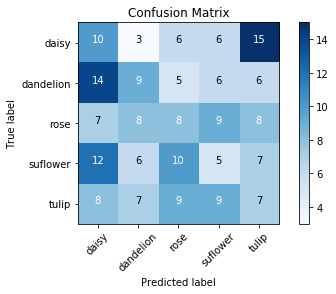

In [200]:
cm = confusion_matrix(test_generator.classes, predictions_classes)
plot_confusion_matrix(cm, 
                      classes=['daisy', 'dandelion', 'rose', 'suflower', 'tulip'],
                      title='Confusion Matrix')

# Data Augmentation in case of small datasets

In [ ]:
train_generator = ImageDataGenerator(rotation_range=10, horizontal_flip=True).flow_from_directory(  train_path,
                                                                                                    target_size=(224, 224),
                                                                                                    batch_size=5,
                                                                                                    class_mode='categorical',
                                                                                                    shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_198 (Conv2D)          (None, 18, 18, 2)         56        
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 16, 16, 3)         57        
_________________________________________________________________
flatten_2 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 1538      
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________
